## K - Means Implementation

The below code cell has the core implementation of K-Means

In [1]:
from sklearn import metrics
import numpy as np
import random

class k_means():

  def __init__(self, k = 3, tol=1e-9):
    '''
    Input :
    1) number of clusters k
    '''
    self.k = k
    self.counts = np.zeros(self.k)
    self.tol = tol
    self.old_centers = np.array([])


  def get_initial_centroids(self, X, k):
    """
    Finds the intial centroids which are intialized randomly.
    Input:
    1) X is the dataset
    2) k is the hyperparameter of K-means

    Output:
    1) cluster centers

    """
    number_of_samples = X.shape[0]
    sample_points_ids = random.sample(range(0, number_of_samples), k)

    centroids = [tuple(X[id]) for id in sample_points_ids]
    unique_centroids = list(set(centroids))

    number_of_unique_centroids = len(unique_centroids)

    while number_of_unique_centroids < k:
        new_sample_points_ids = random.sample(range(0, number_of_samples), k - number_of_unique_centroids)
        new_centroids = [tuple(X[id]) for id in new_sample_points_ids]
        unique_centroids = list(set(unique_centroids + new_centroids))

        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

  def euclidean_distance(self, p1, p2):
    '''
    Calculates the euclidean distance between two points
    Input:
    1) p1 has the dimension 1xn
    2) p2 has the dimension 1xn
    Output:
    1) distance is the euclidean distance between point p1, and p2
    '''
    distance = np.linalg.norm(p2-p1)
    return distance

  def label_fetcher(self, distance_metric_T):
    '''
    Calculates the label of each data points with respect to cluster number.
    Input:
    1) The distance metric is a matrix which contains distances of all points with respect to each cluster. The transpose will have each row as a datapoint's distance to each cluster center
    Output:
    1) label_array is the array containing labels of each data points
    '''
    labels = []
    for row in distance_metric_T:
      self.row = row
      min_index = np.argmin(row)
      labels.append(min_index)
    
    return np.array(labels)



  def points_to_cluster_distance(self, data_points, cluster_center):
    '''
    Calculates the distance array of data_points with respect to the cluster_center
    Input :
    1) data_points
    2) cluster_center has the dimension 1xn
    Output:
    1) Returns the distance array
    '''
    distance_array = []
    # Calculating the distance of each point with the cluster center below, and appending it to the distance array
    for point in data_points:
      dist = self.euclidean_distance(point, cluster_center)
      distance_array.append(dist)
    distance_array = np.array(distance_array)
    return distance_array


  def breaking_condition(self, cluster_center, old_center):
    self.cluster_center = cluster_center
    self.old_center = old_center
    cluster_center = np.concatenate(cluster_center)
    old_center = np.concatenate(old_center)
    dist = self.euclidean_distance(cluster_center, old_center)
    return dist

  def fit(self, data):
    '''
    This function will find the cluster centers, and the assign cluster labels to each samples.
    Input :
    1) data:
       data has the dimension m x n, where m is the number of samples, and n is the dimension. The format of data must be a numpy array.

    Output:
    1) cluster_centers:
        It is a list which contains each cluster centers
    2) labels:
        The labels assigned to each data point, and has the dimension m x 1
    '''
    k = self.k
    iteration = 0
    # Randomly intializing the clusters
    ##cluster_centers = []
    ##for i in range(k):
    ##  cluster_centers.append(np.squeeze(np.random.randn(1, data.shape[1])))

    cluster_centers = self.get_initial_centroids(data, self.k)
    
    self.debug = cluster_centers

    while(1):
      iteration += 1
      clusters = {}
      labels = []
      for i in range(k):
        clusters[i] = []

      

      #Assigning points to the cluster
      for sample in data:
        distance_array = []
        for cluster in cluster_centers:
          distance = self.euclidean_distance(sample, cluster)
          distance_array.append(distance)
        min_index = np.argmin(distance_array)
        
        clusters[min_index].append(sample)
        labels.append(min_index)
      
      #Calculating mean
      old_centers = cluster_centers
      cluster_centers = []
      
      for i in range(k):
      
        if(len(clusters[i]) ==  0): # This handles the situation where clusters have 0 members, or empty cluster situation
          print("Empty cluster found")
          if(self.counts[i] >= 2):
            cluster_centers.append(old_centers[i])
            continue
          cluster_centers.append(np.random.random(old_centers[i].shape))#cluster_centers.append(old_centers[i])
          self.counts[i] += 1
          continue
        mean = np.squeeze(np.mean(clusters[i], axis=0))
        cluster_centers.append(mean)

      # DEBUG
      self.cluster_centers = cluster_centers
      self.old_centers = old_centers
      cond = self.breaking_condition(cluster_centers, old_centers)
      #print(cond)
      if( cond <= self.tol):
        break

    return clusters, cluster_centers, labels, iteration


      

    
    
    



  


# Reading the data which we pre-processed specially for the clustering task, and removing the id column as it is not required for clustering tasks

In [2]:
# Drive loading code, delete later
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
% cd MyDrive
% ls

/gdrive/MyDrive
'Chess Game on Android - Chess.com'   processed_data.csv
'Colab Notebooks'/                   'Studity CN UNIT 2.pptx.gslides'
 home.pdf                             test.png
 LEAD/


In [4]:
import pandas as pd
import csv
df = pd.read_csv('processed_data.csv', index_col=0)


# Step 1: Extract numerical features
data = df.select_dtypes(include=[np.number])
# removing ordinal feature 'ID'
data.drop('ID', axis=1, inplace=True)

data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,processed_value,processed_release_clause,processed_wage,processed_joining,processed_contract_valid,processed_height,processed_weight,processed_LS,processed_ST,processed_RS,processed_LW,processed_LF,processed_CF,processed_RF,processed_RW,processed_LAM,processed_CAM,processed_RAM,processed_LM,processed_LCM,processed_CM,processed_RCM,processed_RM,processed_LWB,processed_LDM,processed_CDM,processed_RDM,processed_RWB,processed_LB,processed_LCB,processed_CB,processed_RCB,processed_RB
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500.0,226500.0,565.0,2004.0,2021.0,170.18,159.0,88.00000,88.00000,88.00000,92.00000,93.00000,93.00000,93.00000,92.00000,93.000000,93.000000,93.000000,91.00000,84.000000,84.000000,84.000000,91.00000,64.000000,61.000000,61.000000,61.000000,64.000000,59.000000,47.000000,47.000000,47.000000,59.000000
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000.0,127100.0,405.0,2018.0,2022.0,187.96,183.0,91.00000,91.00000,91.00000,89.00000,90.00000,90.00000,90.00000,89.00000,88.000000,88.000000,88.000000,88.00000,81.000000,81.000000,81.000000,88.00000,65.000000,61.000000,61.000000,61.000000,65.000000,61.000000,53.000000,53.000000,53.000000,61.000000
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500.0,228100.0,290.0,2017.0,2022.0,175.26,150.0,84.00000,84.00000,84.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.000000,89.000000,89.000000,88.00000,81.000000,81.000000,81.000000,88.00000,65.000000,60.000000,60.000000,60.000000,65.000000,60.000000,47.000000,47.000000,47.000000,60.000000
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000.0,138600.0,260.0,2011.0,2020.0,193.04,168.0,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000.0,196400.0,355.0,2015.0,2023.0,180.34,154.0,82.00000,82.00000,82.00000,87.00000,87.00000,87.00000,87.00000,87.00000,88.000000,88.000000,88.000000,88.00000,87.000000,87.000000,87.000000,88.00000,77.000000,77.000000,77.000000,77.000000,77.000000,73.000000,66.000000,66.000000,66.000000,73.000000


In [5]:
# Visualizing using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


X = data
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

pca = PCA(n_components=3)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3']

# Applying K-means on k = 3, 5, 7

## K = 3

The silhoutte score for k =  3  is  0.4118247852805887


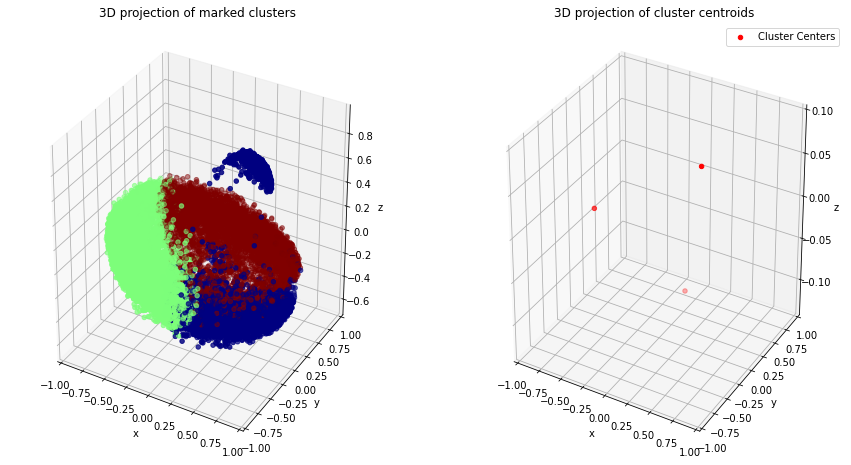

In [6]:
from sklearn.metrics import silhouette_score

k = 3
data_numpy = X_principal.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

fig = plt.figure(figsize=(15,8))
ax = ax = fig.add_subplot(121, projection='3d')#fig.add_subplot(projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],label=np.unique(labels), c = labels,  cmap ='jet' )
cluster_centers = np.concatenate(cluster_centers)
cluster_centers = cluster_centers.reshape(-1,3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of marked clusters')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], label = "Cluster Centers", c='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of cluster centroids')
ax.legend(loc="upper right")
plt.show()


## Cluster analysis

### Silhoutte Coefficient

The Silhouette Coefficient is an example of an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between a sample and all other points in the same class.

* b: The mean distance between a sample and all other points in the next nearest cluster.

In [7]:
print("Silhoutee result for k = ", k , " is ", silhouette_score(data_numpy, np.array(labels)))

Silhoutee result for k =  3  is  0.4118247852805887


### Calinski-Harabasz index

If the ground truth labels are not known, the Calinski-Harabasz index- also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [8]:
# Checking the Calinski-Harabasz Index with above clstering labels.
print(metrics.calinski_harabasz_score(data_numpy,  np.array(labels)))

13401.493863404461


### Davies-Bouldin index
 The Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [9]:
# Checking the davies_bouldin Index with above clstering labels.
print(metrics.davies_bouldin_score(data_numpy, np.array(labels)))

0.9334114998525402


### Determining the most similar attributes of the cluster.

In [10]:
df = data
df['result'] = np.array(labels)

In [11]:
df['result'].value_counts()

0    6681
1    6380
2    5146
Name: result, dtype: int64

In [12]:
df_0 = df[df['result']==0]
df_1 = df[df['result']==1]
df_2 = df[df['result'] == 2]

In [13]:
for column in data.columns:
    print("Mean values for feature ", column, " across 3 clusters are: ")
    print(df_0[column].mean())
    print(df_1[column].mean())
    print(df_2[column].mean())

Mean values for feature  Age  across 3 clusters are: 
24.710672055081574
26.68526645768025
23.718616401088223
Mean values for feature  Overall  across 3 clusters are: 
63.194431971261785
71.03056426332289
64.25009716284492
Mean values for feature  Potential  across 3 clusters are: 
69.25116000598713
73.9257053291536
70.73047026816946
Mean values for feature  Special  across 3 clusters are: 
1358.1826073941027
1847.239655172414
1599.6731441896618
Mean values for feature  International Reputation  across 3 clusters are: 
1.0445025353098625
1.2523510971786833
1.029948158199325
Mean values for feature  Weak Foot  across 3 clusters are: 
2.6853050511036214
3.1086206896551722
3.0874363192499166
Mean values for feature  Skill Moves  across 3 clusters are: 
1.714411240350017
2.796551724137931
2.661554859782762
Mean values for feature  Jersey Number  across 3 clusters are: 
19.705057502134974
16.751253918495298
22.804756427252315
Mean values for feature  Crossing  across 3 clusters are: 
34.582

### Hence second cluster has the players with great values, overall, and better skill sets, balance. They also earn the most.

## Example of such players are Messi, and Ronaldo

### **Since K-MEANS involve random initialization running the kmeans again can give different labels**

In [14]:
# An example of second cluster is 

print(labels[0]+1) # Label corresponding to messi
print(labels[1]+1) # Label corresponding to ronaldo

2
2


## K = 5

The silhoutte score for k =  5  is  0.4951755571768198


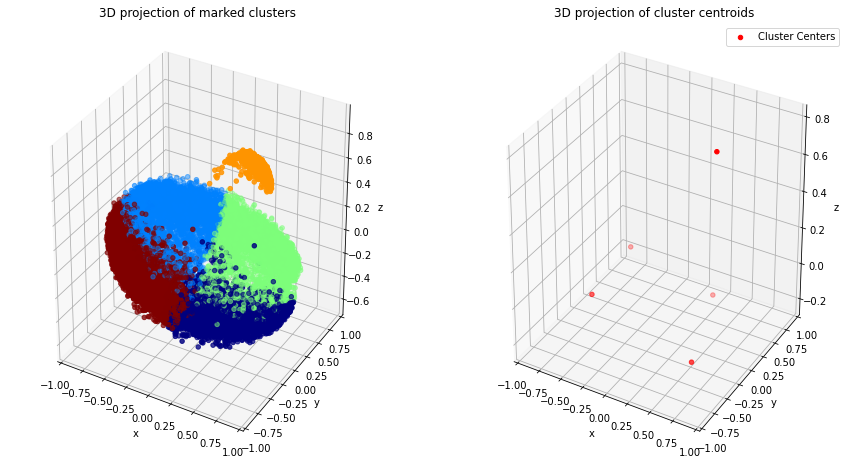

In [15]:
from sklearn.metrics import silhouette_score

k = 5
data_numpy = X_principal.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

fig = plt.figure(figsize=(15,8))
ax = ax = fig.add_subplot(121, projection='3d')#fig.add_subplot(projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],label=np.unique(labels), c = labels,  cmap ='jet' )
cluster_centers = np.concatenate(cluster_centers)
cluster_centers = cluster_centers.reshape(-1,3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of marked clusters')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], label = "Cluster Centers", c='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of cluster centroids')
ax.legend(loc="upper right")
plt.show()


## Cluster analysis

### Silhoutte Coefficient

The Silhouette Coefficient is an example of an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between a sample and all other points in the same class.

* b: The mean distance between a sample and all other points in the next nearest cluster.

In [16]:
print("Silhoutee result for k = ", k , " is ", silhouette_score(data_numpy, np.array(labels)))

Silhoutee result for k =  5  is  0.4951755571768198


### Calinski-Harabasz index

If the ground truth labels are not known, the Calinski-Harabasz index- also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [17]:
# Checking the Calinski-Harabasz Index with above clstering labels.
print(metrics.calinski_harabasz_score(data_numpy,  np.array(labels)))

20617.426991338663


### Davies-Bouldin index
 The Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [18]:
# Checking the davies_bouldin Index with above clstering labels.
print(metrics.davies_bouldin_score(data_numpy, np.array(labels)))

0.668510025724896


### Determining the most similar attributes of the cluster.

In [19]:
df = data
df['result'] = np.array(labels)

In [20]:
df['result'].value_counts()

4    4867
0    4537
1    3620
2    3157
3    2026
Name: result, dtype: int64

In [21]:
df_0 = df[df['result']==0]
df_1 = df[df['result']==1]
df_2 = df[df['result'] == 2]
df_3 = df[df['result'] == 3]
df_4 = df[df['result'] == 4]

In [22]:
for column in data.columns:
    print("Mean values for feature ", column, " across 5 clusters are: ")
    print(df_0[column].mean())
    print(df_1[column].mean())
    print(df_2[column].mean())
    print(df_3[column].mean())
    print(df_4[column].mean())

Mean values for feature  Age  across 5 clusters are: 
24.223716111968262
26.170994475138123
22.19417168197656
26.045903257650544
26.69447298130265
Mean values for feature  Overall  across 5 clusters are: 
62.79215340533392
70.66629834254144
60.5245486221096
64.59970384995064
70.54715430449968
Mean values for feature  Potential  across 5 clusters are: 
69.08463742561163
73.86878453038673
69.19860627177701
69.79269496544916
73.47236490651325
Mean values for feature  Special  across 5 clusters are: 
1497.9354198809785
1781.5209944751382
1508.1849857459613
1046.1979269496544
1842.0277378261762
Mean values for feature  International Reputation  across 5 clusters are: 
1.0203401897108433
1.2058011049723756
1.003848976807357
1.0957551826258638
1.2091637559071295
Mean values for feature  Weak Foot  across 5 clusters are: 
2.7715388289490863
3.273756906077348
2.9752925810393775
2.490128331688055
3.040476679679474
Mean values for feature  Skill Moves  across 5 clusters are: 
2.0261137193786096
3

### The second cluster has player with higher values, and better skill sets.  Example of such players are **messi and ronaldo** as shown below

### The fourth cluster has players with good goal keeping capabilities, but weak overall balance. They also earn average wages

### **Since K-MEANS involve random initialization running the kmeans again can give different labels**

In [23]:
# An example of fifth cluster is 

print(labels[0]+1) # Label corresponding to messi
print(labels[1]+1) # Label corresponding to ronaldo

2
2


## K = 7

The silhoutte score for k =  7  is  0.4377206369522272


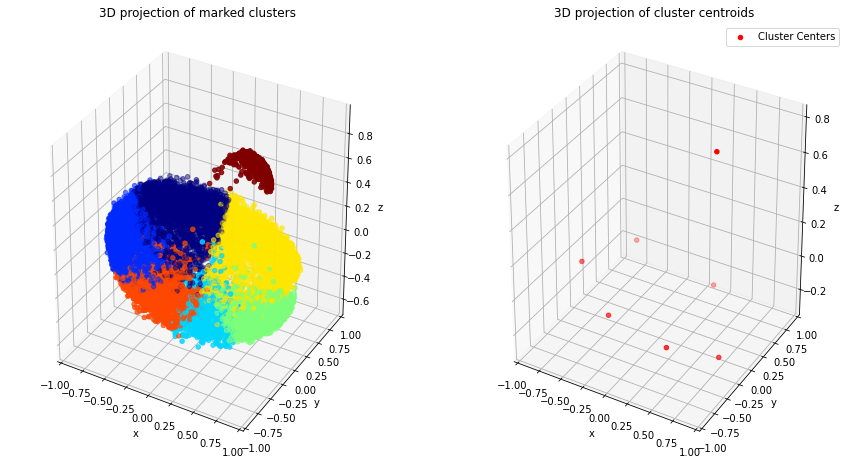

In [24]:
from sklearn.metrics import silhouette_score

k = 7
data_numpy = X_principal.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

fig = plt.figure(figsize=(15,8))
ax = ax = fig.add_subplot(121, projection='3d')#fig.add_subplot(projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],label=np.unique(labels), c = labels,  cmap ='jet' )
cluster_centers = np.concatenate(cluster_centers)
cluster_centers = cluster_centers.reshape(-1,3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of marked clusters')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], label = "Cluster Centers", c='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of cluster centroids')
ax.legend(loc="upper right")
plt.show()


## Cluster analysis

### Silhoutte Coefficient

The Silhouette Coefficient is an example of an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between a sample and all other points in the same class.

* b: The mean distance between a sample and all other points in the next nearest cluster.

In [25]:
print("Silhoutee result for k = ", k , " is ", silhouette_score(data_numpy, np.array(labels)))

Silhoutee result for k =  7  is  0.4377206369522272


### Calinski-Harabasz index

If the ground truth labels are not known, the Calinski-Harabasz index- also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [26]:
# Checking the Calinski-Harabasz Index with above clstering labels.
print(metrics.calinski_harabasz_score(data_numpy,  np.array(labels)))

21596.177135115126


### Davies-Bouldin index
 The Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [27]:
# Checking the davies_bouldin Index with above clstering labels.
print(metrics.davies_bouldin_score(data_numpy, np.array(labels)))

0.8037557804767238


### Determining the most similar attributes of the cluster.

In [28]:
df = data
df['result'] = np.array(labels)

In [29]:
df['result'].value_counts()

0    3279
1    3111
4    2990
3    2325
5    2315
2    2161
6    2026
Name: result, dtype: int64

In [30]:
df_0 = df[df['result']==0]
df_1 = df[df['result']==1]
df_2 = df[df['result'] == 2]
df_3 = df[df['result'] == 3]
df_4 = df[df['result'] == 4]
df_5 = df[df['result'] == 5]
df_6 = df[df['result'] == 6]


In [31]:
for column in data.columns:
    print("Mean values for feature ", column, " across 7 clusters are: ")
    print(df_0[column].mean())
    print(df_1[column].mean())
    print(df_2[column].mean())
    print(df_3[column].mean())
    print(df_4[column].mean())
    print(df_5[column].mean())
    print(df_6[column].mean())

Mean values for feature  Age  across 7 clusters are: 
26.013113754193352
26.85824493731919
26.094400740397965
22.279139784946235
22.214715719063545
26.422030237580994
26.045903257650544
Mean values for feature  Overall  across 7 clusters are: 
70.15157060079292
72.23207971713275
66.59093012494216
58.89634408602151
60.552173913043475
68.46652267818574
64.59970384995064
Mean values for feature  Potential  across 7 clusters are: 
73.5211954864288
74.80713596914175
70.40583063396576
67.75612903225806
69.20234113712375
71.92051835853131
69.79269496544916
Mean values for feature  Special  across 7 clusters are: 
1760.0634339737726
1917.0938604950177
1576.0837575196667
1414.7178494623656
1505.735117056856
1744.7589632829374
1046.1979269496544
Mean values for feature  International Reputation  across 7 clusters are: 
1.1646843549862762
1.3114754098360655
1.0413506085722963
1.0008602150537635
1.0045940899976638
1.1094339811149816
1.0957551826258638
Mean values for feature  Weak Foot  across 7 c

### The first, and second cluster has player with higher values, and better skill sets. These players also earn the highest.  Example of such players are **messi and ronaldo** as shown below

### The seventh cluster has players with good goal keeping capabilities, but weak overall balance. They also earn average wages

### **Since K-MEANS involve random initialization running the kmeans again can give different labels**

In [32]:
# An example of fifth cluster is 

print(labels[0]+1) # Label corresponding to messi
print(labels[1]+1) # Label corresponding to ronaldo

1
2


# Elbow method, and Silhoutte Score.



In [33]:
max_k = 10
experiment_frequency = 3 # Every experiment will be performed 10 times since random initialization is involved.

silhoutte_scores = []
for i in range(2, max_k+1):
  kmeans = k_means(i)
  data_numpy = X_principal.to_numpy()
  clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)
  score = silhouette_score(data_numpy, np.array(labels))
  silhoutte_scores.append(score)
  print("For k = ", i, " clustering is done... score is ", score)

 


For k =  2  clustering is done... score is  0.3720942623408392
For k =  3  clustering is done... score is  0.4194547691862665
For k =  4  clustering is done... score is  0.4961393255733826
For k =  5  clustering is done... score is  0.4951755571768198
For k =  6  clustering is done... score is  0.4756792684159947
For k =  7  clustering is done... score is  0.4498303704609059
For k =  8  clustering is done... score is  0.42493065427984994
For k =  9  clustering is done... score is  0.43878242236490983
For k =  10  clustering is done... score is  0.4149227247963859


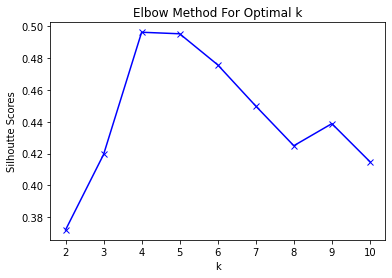

In [34]:
K = range(2,max_k+1)
plt.plot(K, silhoutte_scores, 'bx-')
plt.xlim
plt.xlabel('k')
plt.ylabel('Silhoutte Scores')
plt.title('Elbow Method For Optimal k')
plt.show()

## Hence the peak is at 4. So optimal K for our case is 4.

The silhoutte score for k =  4  is  0.4961393255733826


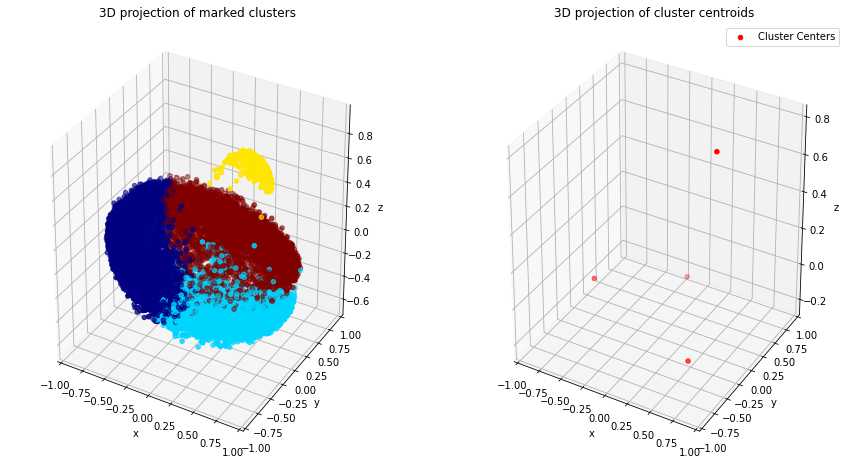

In [35]:
from sklearn.metrics import silhouette_score

k = 4
data_numpy = X_principal.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

fig = plt.figure(figsize=(15,8))
ax = ax = fig.add_subplot(121, projection='3d')#fig.add_subplot(projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],label=np.unique(labels), c = labels,  cmap ='jet' )
cluster_centers = np.concatenate(cluster_centers)
cluster_centers = cluster_centers.reshape(-1,3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of marked clusters')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], label = "Cluster Centers", c='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.title.set_text('3D projection of cluster centroids')
ax.legend(loc="upper right")
plt.show()


## Cluster analysis

### Silhoutte Coefficient

The Silhouette Coefficient is an example of an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between a sample and all other points in the same class.

* b: The mean distance between a sample and all other points in the next nearest cluster.

In [36]:
print("Silhoutee result for k = ", k , " is ", silhouette_score(data_numpy, np.array(labels)))

Silhoutee result for k =  4  is  0.4961393255733826


### Calinski-Harabasz index

If the ground truth labels are not known, the Calinski-Harabasz index- also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [37]:
# Checking the Calinski-Harabasz Index with above clstering labels.
print(metrics.calinski_harabasz_score(data_numpy,  np.array(labels)))

17085.97315526943


### Davies-Bouldin index
 The Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [38]:
# Checking the davies_bouldin Index with above clstering labels.
print(metrics.davies_bouldin_score(data_numpy, np.array(labels)))

0.685484104505905


### Determining the most similar attributes of the cluster.

In [39]:
df = data
df['result'] = np.array(labels)

In [40]:
df['result'].value_counts()

0    6151
3    5040
1    4989
2    2027
Name: result, dtype: int64

In [41]:
df_0 = df[df['result']==0]
df_1 = df[df['result']==1]
df_2 = df[df['result'] == 2]
df_3 = df[df['result'] == 3]



In [42]:
for column in data.columns:
    print("Mean values for feature ", column, " across 7 clusters are: ")
    print(df_0[column].mean())
    print(df_1[column].mean())
    print(df_2[column].mean())
    print(df_3[column].mean())


Mean values for feature  Age  across 7 clusters are: 
26.73955454397659
24.262978552816197
26.042920572274298
23.62857142857143
Mean values for feature  Overall  across 7 clusters are: 
71.29231019346447
62.97033473642013
64.59447459299457
63.96765873015873
Mean values for feature  Potential  across 7 clusters are: 
74.10144691920013
69.20926037282021
69.7913172175629
70.58373015873016
Mean values for feature  Special  across 7 clusters are: 
1855.8353113314909
1509.7255963118862
1046.3083374444993
1591.9035714285715
Mean values for feature  International Reputation  across 7 clusters are: 
1.262396358315721
1.023913096725124
1.0957079427725702
1.0266135359002528
Mean values for feature  Weak Foot  across 7 clusters are: 
3.1285969761014467
2.7793139620530423
2.4903798717316232
3.076085910436647
Mean values for feature  Skill Moves  across 7 clusters are: 
2.844578117379288
2.0326177031067565
1.0004933399111988
2.6441692627819324
Mean values for feature  Jersey Number  across 7 cluster

### The first cluster has player with higher values, and better skill sets. These players also earn the highest.  Example of such players are **messi and ronaldo** as shown below

### The third cluster has players with good goal keeping capabilities, but weak overall balance. They also earn average wages

### **Since K-MEANS involve random initialization running the kmeans again can give different labels**

In [43]:
# An example of fifth cluster is 

print(labels[0]+1) # Label corresponding to messi
print(labels[1]+1) # Label corresponding to ronaldo

1
1
